In [1]:
import tensorflow as tf
print(tf.__version__)
# Artificial Neural Network : 인공 신경망

2.18.0


In [8]:
mnist = tf.keras.datasets.mnist
# 텐서플로에서 MNIST 손글씨 숫자 데이터셋 모듈을 불러옴
# MNIST (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# MNIST 데이터셋을 (학습용 이미지, 정답)과 (테스트용 이미지, 정답)으로 나눠서 불러옴

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# 이미지 픽셀 값을 0~1 범위로 정규화 (신경망 학습을 원활하게 하기 위함)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 학습용 데이터의 형태 출력 (총 60,000장, 각 장은 28x28 픽셀)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [6]:
model = tf.keras.models.Sequential([

    # 1. 입력 이미지를 1차원으로 펼침 (28x28 → 784)
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # 2. 첫 번째 Dense (완전연결) 은닉층: 뉴런 128개, 활성화 함수는 ReLU
    tf.keras.layers.Dense(128, activation='relu'),

    # 3. 과적합 방지를 위한 Dropout 층: 20% 뉴런 임시 제거
    tf.keras.layers.Dropout(0.2),

    # 4. 출력층: 뉴런 10개 (0~9 숫자), softmax로 확률 분포 출력
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# 모델 컴파일: 학습 방법을 설정함
model.compile(
    optimizer='adam',                           # 가중치 조정 알고리즘(Adam 최적화기 사용)
    loss='sparse_categorical_crossentropy',     # 다중 분류 문제에 적합한 손실 함수
    metrics=['accuracy']                        # 정확도를 평가 지표로 사용
)

# 모델 학습: 실제로 데이터를 사용해 학습을 수행함
r = model.fit(
    x_train, y_train,                           # 학습용 입력과 정답
    validation_data=(x_test, y_test),           # 검증용 데이터(정확도 확인용)
    epochs=10                                   # 전체 데이터셋을 10번 반복 학습
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8562 - loss: 0.4966 - val_accuracy: 0.9585 - val_loss: 0.1422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9551 - loss: 0.1545 - val_accuracy: 0.9692 - val_loss: 0.1007
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9678 - loss: 0.1061 - val_accuracy: 0.9720 - val_loss: 0.0955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9731 - loss: 0.0862 - val_accuracy: 0.9764 - val_loss: 0.0792
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9761 - loss: 0.0734 - val_accuracy: 0.9787 - val_loss: 0.0699
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9787 - loss: 0.0646 - val_accuracy: 0.9791 - val_loss: 0.0713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9813 - loss: 0.0571 - val_accuracy: 0.9781 - val_loss: 0.0739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9832 - loss: 0.0

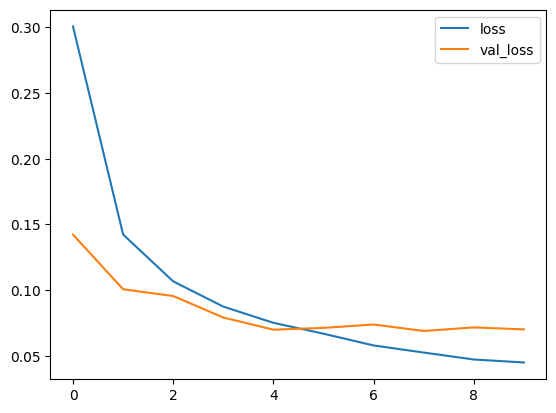

In [9]:
# loss (Training Loss) : 모델이 훈련 데이터(x_train, y_train) 에서 얼마나 오차를 내는지 측정
# val_loss (Validation Loss) : 모델이 검증 데이터(x_test, y_test) 에서 오차를 얼마나 내는지 측정
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

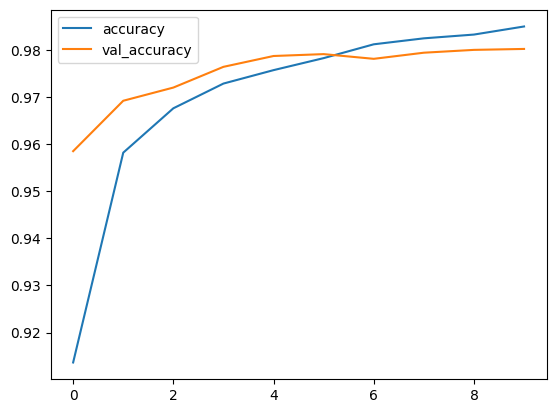

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [11]:
# 모델 성능을 평가하셔서 손실값과 정확도를 출력해주세요

print("Train score:", model.evaluate(x_train, y_train))
print("Test score:", model.evaluate(x_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0178
Train score: [0.016907185316085815, 0.9948833584785461]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0832
Test score: [0.0701683983206749, 0.9801999926567078]


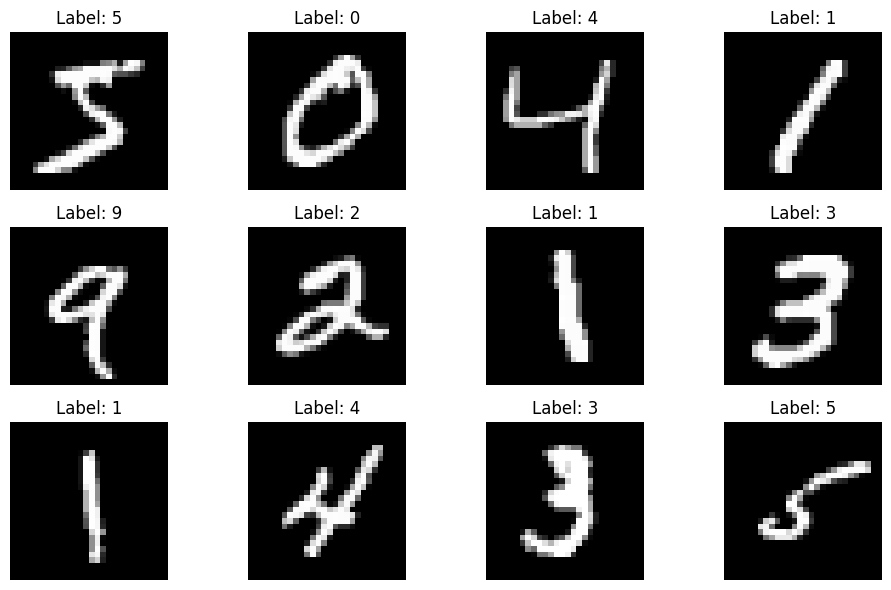

In [13]:
plt.figure(figsize=(10, 6))
for i in range(12):
  plt.subplot(3, 4, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


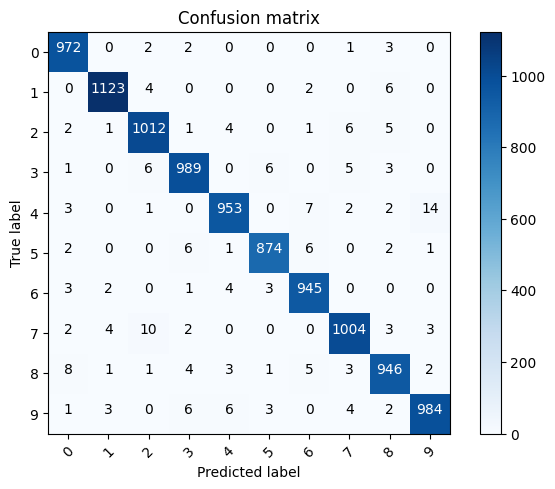

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# 혼동 행렬 시각화 함수
def plot_confusion_matrix(cm, classes,
                          normalize=False,       # 정규화 여부 (비율로 보여줄지)
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):    # 색상 맵 설정

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # 행렬을 이미지처럼 보여줌
    plt.title(title)                                     # 그래프 제목
    plt.colorbar()                                       # 색상 범례

    tick_marks = np.arange(len(classes))                # 클래스 수 만큼 눈금 생성
    plt.xticks(tick_marks, classes, rotation=45)        # x축 클래스 이름 지정 (회전 포함)
    plt.yticks(tick_marks, classes)                     # y축 클래스 이름 지정

    fmt = 'd'
    # 혼동 행렬 안에 숫자 텍스트로 표시
    thresh = cm.max() / 2.  # 중간값 기준으로 색 대비
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()       # 레이아웃 정리
    plt.ylabel('True label') # y축 라벨
    plt.xlabel('Predicted label') # x축 라벨
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [15]:
print(cm)

[[ 972    0    2    2    0    0    0    1    3    0]
 [   0 1123    4    0    0    0    2    0    6    0]
 [   2    1 1012    1    4    0    1    6    5    0]
 [   1    0    6  989    0    6    0    5    3    0]
 [   3    0    1    0  953    0    7    2    2   14]
 [   2    0    0    6    1  874    6    0    2    1]
 [   3    2    0    1    4    3  945    0    0    0]
 [   2    4   10    2    0    0    0 1004    3    3]
 [   8    1    1    4    3    1    5    3  946    2]
 [   1    3    0    6    6    3    0    4    2  984]]


Text(0.5, 1.0, 'True label: 3 Predicted: 7')

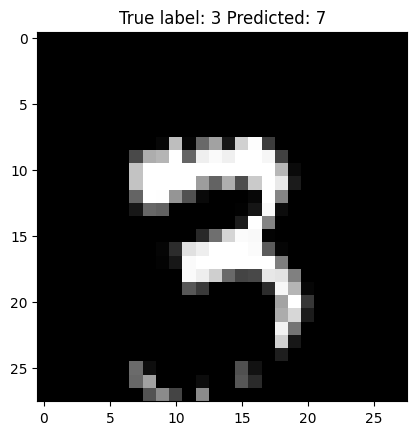

In [16]:
# 1. 예측 결과(p_test)와 실제 정답(y_test)가 다른 인덱스를 추출
misclassified_idx = np.where(p_test != y_test)[0]
# → p_test와 y_test가 다르면 True가 되고, np.where는 그 True인 인덱스만 반환함

# 예시:
# p_test = [1, 2, 3, 4]
# y_test = [1, 2, 4, 4]
# → p_test != y_test = [False, False, True, False]
# → np.where(...) = array([2])  # 오분류된 인덱스만 모임

# 2. 오분류된 인덱스 중 하나를 무작위로 선택
i = np.random.choice(misclassified_idx)
# → np.random.choice는 리스트 중 하나를 무작위로 뽑는 함수

# 3. 선택된 인덱스의 이미지 데이터를 흑백으로 시각화
plt.imshow(x_test[i], cmap='gray')
# → x_test[i]는 28x28 이미지 데이터, 흑백(cmap='gray')으로 시각화함

# 4. 해당 이미지의 실제 레이블과 모델이 예측한 값을 함께 제목으로 표시
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
# → y_test[i]: 정답 라벨
# → p_test[i]: 모델이 예측한 라벨